## Question1 Perceptron Algorithm
 (a) Create and plot a linearly separable dataset in 2D with at least 1000 data points. Clearly
 label the two classes.
 (b) Train the Perceptron Learning Algorithm on this dataset. Plot the decision boundary after
 training .
 (c) Add noise to the dataset by flipping the labels of 10% of the points.
    • Plot the noisy dataset.
    • Train the Perceptron Learning Algorithm for different numbers of iterations.
    • Compare the results visually (decision boundaries) and quantitatively (accuracy or num
    ber of misclassifications).

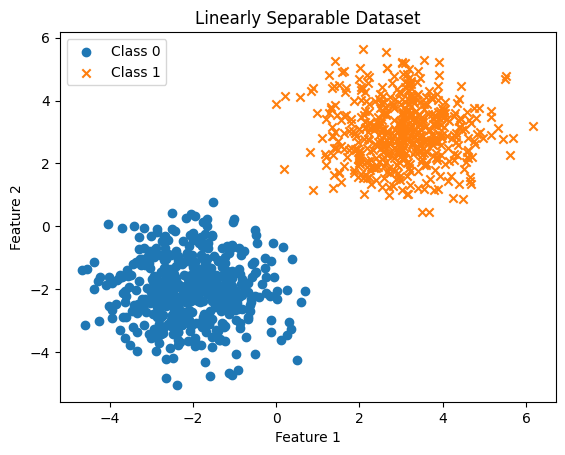

In [178]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


def dataset_generation(
    num_points, mean_class_a, variance_class_a, mean_class_b, variance_class_b
):
    np.random.seed(0)
    class_a_points = np.random.normal(
        loc=mean_class_a, scale=variance_class_a, size=(num_points // 2, 2)
    )
    class_b_points = np.random.normal(
        loc=mean_class_b, scale=variance_class_b, size=(num_points // 2, 2)
    )
    X = np.vstack((class_a_points, class_b_points))
    y = np.concatenate((-1 * np.ones(num_points // 2), np.ones(num_points // 2)))

    # Shuffle the dataset
    shuffled_indices = np.random.permutation(num_points)
    X = X[shuffled_indices]
    y = y[shuffled_indices]

    return X, y


def plot_dataset(features, labels, title):
    plt.scatter(
        features[labels == -1, 0],
        features[labels == -1, 1],
        marker="o",
        label="Class 0",
    )
    plt.scatter(
        features[labels == 1, 0], features[labels == 1, 1], marker="x", label="Class 1"
    )
    plt.title("Linearly Separable Dataset")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()


num_points = 1000
mean_class_a = [-2, -2]
variance_class_a = [1, 1]
mean_class_b = [3, 3]
variance_class_b = [1, 1]

features, labels = dataset_generation(
    num_points, mean_class_a, variance_class_a, mean_class_b, variance_class_b
)

plot_dataset(features, labels, title="Original Dataset")

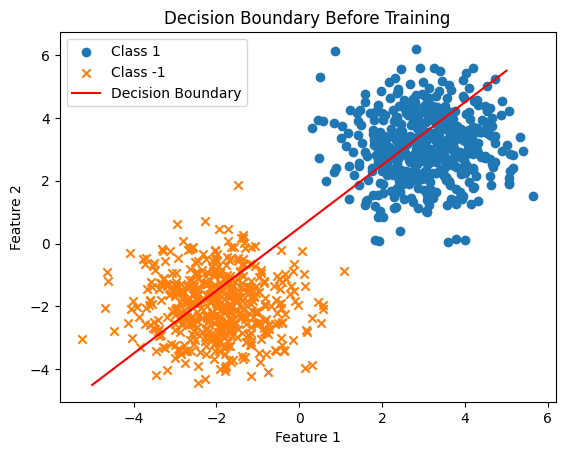

In [171]:
def plot_decision_boundary(features, labels, weights, bias, title):
    plt.scatter(
        features[labels == 1][:, 0],
        features[labels == 1][:, 1],
        label="Class 1",
        marker="o",
    )
    plt.scatter(
        features[labels == -1][:, 0],
        features[labels == -1][:, 1],
        label="Class -1",
        marker="x",
    )

    x_vals = np.linspace(-5, 5, 100)
    y_vals = (-weights[0] * x_vals - bias) / weights[1]
    plt.plot(x_vals, y_vals, "-r", label="Decision Boundary")

    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()


weights_initial = np.array([1.0, -1.0])
bias_initial = 0.5
# Plot decision boundary and dataset before training
plot_decision_boundary(
    features,
    labels,
    weights_initial,
    bias_initial,
    title="Decision Boundary Before Training",
)

[2.21104813 1.75439358]


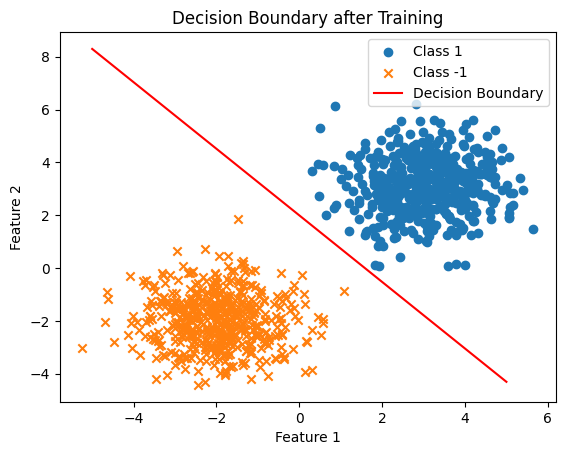

accuracy_score is 0.48
misclassification for the normal dataset 0


In [ ]:
class PerceptronNeuron:
    def __init__(self, iter):
        self.weights = None
        self.bias = 0.5
        self.iter = iter

    def pla_train(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        k = 0
        while k < self.iter:
            self.misclassified = 0
            for i in range(n_samples):
                linear_output = (np.transpose(self.weights) @ X[i] + self.bias) * y[i]
                if linear_output <= 0:
                    self.weights = self.weights + y[i] * X[i]
                    self.bias += y[i]
                    self.misclassified += 1
            k += 1

    def pla_predict(self, X):
        linear_output = np.dot(X[i], self.weights)
        return linear_output

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)


if __name__ == "__main__":

    X_train, X_test, y_train, y_test = train_test_split(
        features, labels, test_size=0.2, random_state=42
    )

    def visualize(X, y, msg):
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolors="k")
        plt.xlabel(f"Feature 1 {msg}")
        plt.ylabel(f"Feature 2 {msg}")
        plt.title(f"Linearly Separable Dataset {msg}")
        plt.show()

    perceptron = PerceptronNeuron(1000)

    perceptron.pla_train(X_train, y_train)
    print("perceptron weights in the dataset are", perceptron.weights)
    y_pred = perceptron.predict(X_test)

    # Calculate accuracy
    plot_decision_boundary(
        features,
        labels,
        perceptron.weights,
        perceptron.bias,
        "Decision Boundary after Training",
    )

    accuracy = accuracy_score(y_test, y_pred)
    print(f"accuracy_score is {accuracy}")
    print(f"misclassification for the normal dataset {perceptron.misclassified}")

[4.06610258 1.79778489]


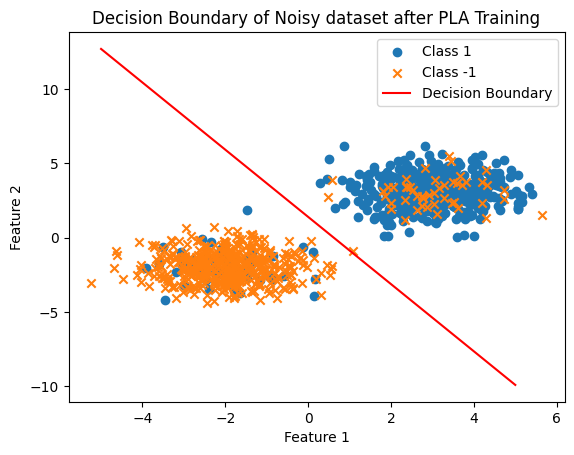

accuracy_score is 0.465
misclassification for the noisy dataset 165


In [176]:
# making dataset a bit noisy
def add_noise_to_dataset(features, labels, flip_percentage=0.10):
    dataset_size = len(labels)
    num_flips = int(flip_percentage * dataset_size)
    flip_indices = np.random.choice(dataset_size, num_flips, replace=False)
    noisy_labels = np.copy(labels)
    noisy_labels[flip_indices] = -noisy_labels[flip_indices]  # Flip binary labels

    return features, noisy_labels


perceptron_noisy = PerceptronNeuron(1000)  # criteria to chose the hyperparameter

noisy_features, noisy_labels = add_noise_to_dataset(
    features, labels, flip_percentage=0.10
)

X_train_noisy, X_test_noisy, y_train_noisy, y_test_noisy = train_test_split(
    noisy_features, noisy_labels, test_size=0.2, random_state=42
)

perceptron_noisy.pla_train(X_train_noisy, y_train_noisy)
print(perceptron_noisy.weights)

y_pred_noisy = perceptron_noisy.predict(X_test_noisy)

# Calculate accuracy
plot_decision_boundary(
    noisy_features,
    noisy_labels,
    perceptron_noisy.weights,
    perceptron_noisy.bias,
    title="Decision Boundary of Noisy dataset after PLA Training",
)

noisy_accuracy = accuracy_score(y_test_noisy, y_pred_noisy)
print(f"accuracy_score is {noisy_accuracy}")
print(f"misclassification for the noisy dataset {perceptron_noisy.misclassified}")

### Results

- accuracy_score for the normal dataset is 0.48
- misclassification for the normal dataset 0

- accuracy_score for the noisy dataset is 0.445
- misclassification for the noisy dataset using PLA is 165

## question2: Gradient Descent
 (a) Choose an appropriate loss function (e.g., Log Loss, Hinge Loss) for binary classification and
 explain why you chose it. 
 (b) Use Gradient Descent to classify the dataset for both cases:
    • Linearly separable dataset (from Q1a).
    • Noisy dataset (from Q1c).
 Tasks:
    • Train the Gradient Descent algorithm on the datasets.
    • Plot the decision boundaries for both cases.
    • Compare the performance of Gradient Descent with the Perceptron Algorithm in terms
    of accuracy and sensitivity to noise.
 

C:\Users\pantm\AppData\Local\Temp\ipykernel_16184\3521507077.py:23: RuntimeWarning: divide by zero encountered in log
  cost = (1 / m) * (-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h)))


Final Weights: [11.18143743  9.18456384]
Final Bias: -4.571020016781619


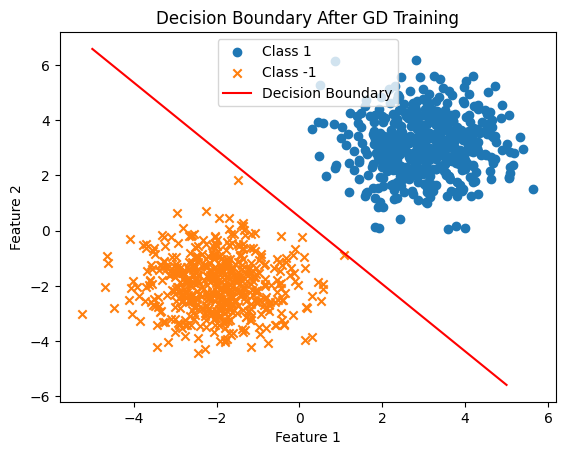

In [177]:
def sigmoid(X, weights, bias):
    z = X.dot(weights) + bias
    return 1 / (1 + np.exp(-z))


def gradient_descent_learning(X, y, weights, bias, eta=0.01, n_iter=1000):
    m = X.shape[0]  # Number of samples
    for _ in range(n_iter):
        predictions = sigmoid(X, weights, bias)
        errors = predictions - y
        gd_weights = X.T.dot(errors) / m
        gd_bias = np.sum(errors) / m

        weights -= eta * gd_weights
        bias -= eta * gd_bias

    return weights, bias


def cross_entropy_loss(X, y, weights, bias):
    m = len(y)
    h = sigmoid(X, weights, bias)
    cost = (1 / m) * (-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h)))
    return cost


weights_initial = np.array([1.0, -1.0])
bias_initial = 0.5

final_weights, final_bias = gradient_descent_learning(
    features, labels, weights_initial, bias_initial
)

# Calculate final cost
final_cost = cross_entropy_loss(features, labels, final_weights, final_bias)
print("Final Weights:", final_weights)
print("Final Bias:", final_bias)

plot_decision_boundary(
    features,
    labels,
    final_weights,
    final_bias,
    title="Decision Boundary After GD Training",
)

### Reason for choosing Log Loss function (Binary cross entropy)

- BCE measures the difference between the predicted probabilities (from a sigmoid activation function) and the true binary labels (0 or 1).
- BCE is equivalent to maximizing the likelihood of the observed data under the model's predicted probabilities. This makes it statistically efficient and consistent for binary classification tasks
- The predicted probabilities from BCE are interpretable as confidence scores, making it intuitive for binary classification problems.
- BCE provides smooth gradients, which leads to better convergence during training. It avoids abrupt changes in loss values, helping gradient-based optimization methods find optimal solutions efficiently

C:\Users\pantm\AppData\Local\Temp\ipykernel_16184\1295694874.py:21: RuntimeWarning: divide by zero encountered in log
  cost = (1/m) * (-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h)))


Final Weights: [16.23428803 14.1077734 ]
Final Bias: -4.5527771564030886


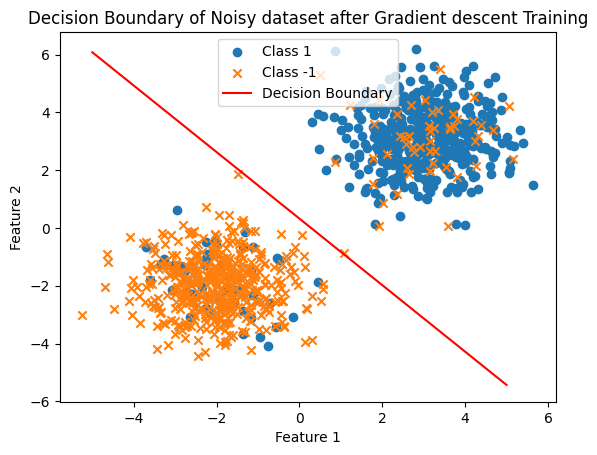

In [175]:
noisy_features, noisy_labels = add_noise_to_dataset(
    features, labels, flip_percentage=0.10
)
final_weights, final_bias = gradient_descent_learning(
    noisy_features, noisy_labels, weights_initial, bias_initial
)

# Calculate final cost
final_cost = cross_entropy_loss(noisy_features, noisy_labels, final_weights, final_bias)
print("Final Weights:", final_weights)
print("Final Bias:", final_bias)

plot_decision_boundary(
    noisy_features,
    noisy_labels,
    final_weights,
    final_bias,
    title="Decision Boundary of Noisy dataset after Gradient descent Training",
)

**Summary Table**

| Feature             | Gradient Descent                                  | Perceptron Learning Algorithm (PLA)         |
| ------------------- | ------------------------------------------------- | ------------------------------------------- |
| Accuracy (ideal)    | High                                              | High                                        |
| Accuracy (noisy)    | Good, minimizes overall error                      | Can be poor, sensitive to outliers          |
| Sensitivity to Noise | Lower, minimizes average error                   | High, reacts strongly to misclassifications |
| Convergence         | Generally converges, even with noise              | May not converge with non-separable or noisy data |

**In conclusion:**

Gradient Descent is generally more robust and suitable for real-world datasets that contain noise or are not perfectly linearly separable. The Perceptron Learning Algorithm can be effective for perfectly separable data, but its sensitivity to noise limits its applicability in more complex scenarios.
---

## question3 
Consider a regression analysis dataset with two features and 1000 non-linear samples in 2D. Train a Multi-layer perceptron (MLP) with a single hidden layer for classifying the same. Experiment with the following variations and comment on its performance:
    (a) Weight initializations: zero versus random weights
    (b) Two different learning rates
    (c) Two loss functions of your choice
    (d) Change the number of nodes in hidden layer and compare
Justify your difference in performance in terms of loss values, convergence rates, fitting curves, etc., with plots. All the steps in MLP training have to be implemented from scratch, including forward pass, backward pass, gradient descent, loss functions, and activation functions. You are allowed to reuse parts of your code from the previous question. 

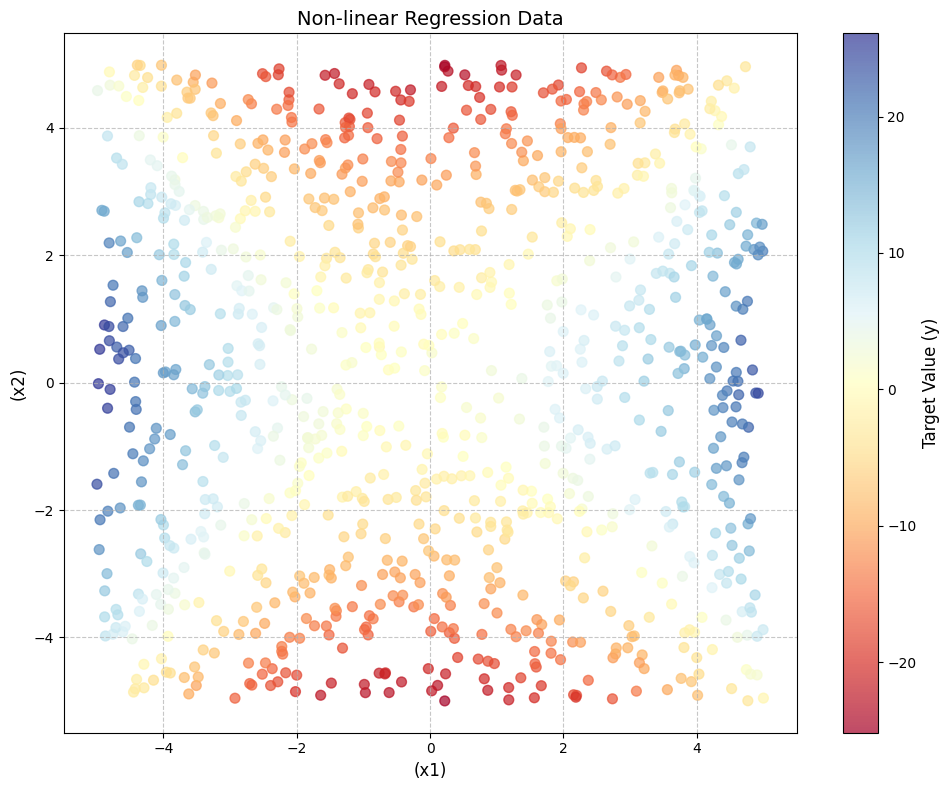

In [179]:
def generate_data():
    np.random.seed(0)
    n_samples = 1000

    x1 = np.random.uniform(-5, 5, n_samples)
    x2 = np.random.uniform(-5, 5, n_samples)
    y = np.sin(x1) + np.cos(x2) + x1**2 - x2**2 + np.random.normal(0, 0.5, n_samples)

    X = np.column_stack((x1, x2))
    y = y.reshape(-1, 1)

    return X, y


X, y = generate_data()


def generate_2d_plot(X, y):
    x1, x2 = X[:, 0], X[:, 1]
    fig, subplot = plt.subplots(figsize=(10, 8))
    scatter = subplot.scatter(x1, x2, c=y, cmap="RdYlBu", s=50, alpha=0.7)
    subplot.set_xlabel("(x1)", fontsize=12)
    subplot.set_ylabel("(x2)", fontsize=12)
    subplot.set_title("Non-linear Regression Data", fontsize=14)
    cbar = plt.colorbar(scatter)
    cbar.set_label("Target Value (y)", fontsize=12)

    subplot.grid(True, linestyle="--", alpha=0.7)
    plt.tight_layout()

    plt.show()


generate_2d_plot(X, y)


Running experiment: Zero Init, LR=0.01, MSE, Hidden=10
Epoch 0, Train Loss: 0.999912, Test Loss: 0.993797
Epoch 100, Train Loss: 0.999383, Test Loss: 0.993216
Epoch 200, Train Loss: 0.998692, Test Loss: 0.992399
Epoch 300, Train Loss: 0.997412, Test Loss: 0.990887
Epoch 400, Train Loss: 0.994963, Test Loss: 0.988036
Epoch 500, Train Loss: 0.990300, Test Loss: 0.982673
Epoch 600, Train Loss: 0.981522, Test Loss: 0.972735
Epoch 700, Train Loss: 0.965345, Test Loss: 0.954846
Epoch 800, Train Loss: 0.936534, Test Loss: 0.924030
Epoch 900, Train Loss: 0.887899, Test Loss: 0.874021

Running experiment: Random Init, LR=0.01, MSE, Hidden=10
Epoch 0, Train Loss: 1.000000, Test Loss: 0.993972
Epoch 100, Train Loss: 1.000000, Test Loss: 0.993972
Epoch 200, Train Loss: 1.000000, Test Loss: 0.993972
Epoch 300, Train Loss: 1.000000, Test Loss: 0.993972
Epoch 400, Train Loss: 1.000000, Test Loss: 0.993972
Epoch 500, Train Loss: 1.000000, Test Loss: 0.993972
Epoch 600, Train Loss: 1.000000, Test Loss

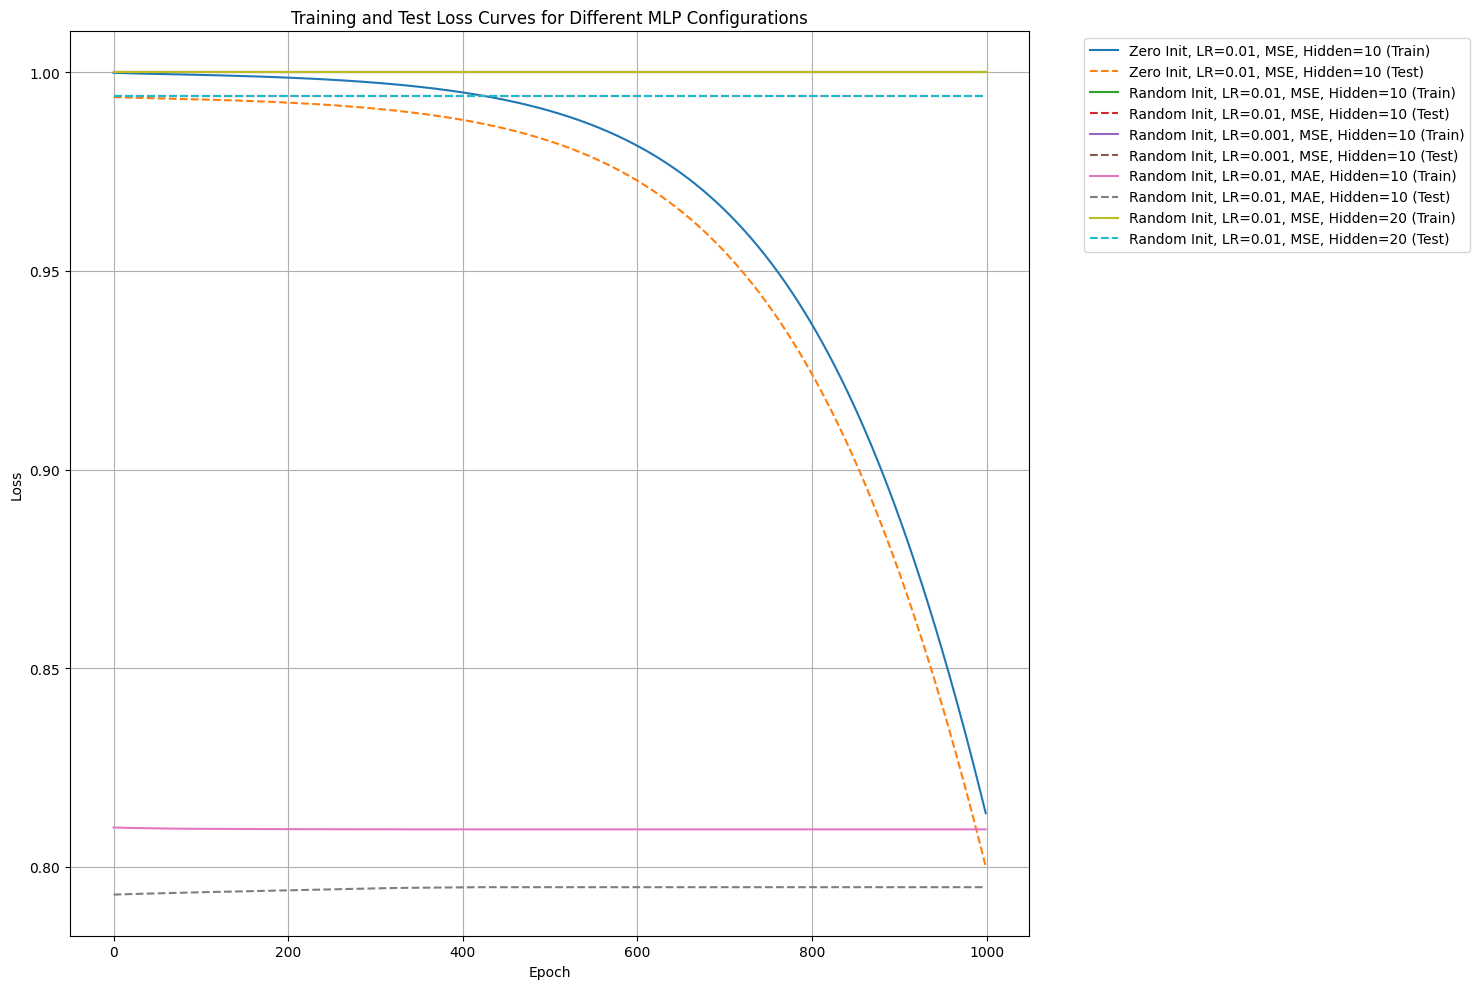

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


class MLP:
    def __init__(self, input_size, hidden_size, output_size, weight_init=True):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights based on initialization strategy
        if weight_init:
            self.W1 = np.zeros((self.input_size, self.hidden_size))
            self.b1 = np.zeros((1, self.hidden_size))
            self.W2 = np.zeros((self.hidden_size, self.output_size))
            self.b2 = np.zeros((1, self.output_size))
        else:  # random initialization
            self.W1 = np.random.randn(self.input_size, self.hidden_size) * 0.01
            self.b1 = np.zeros((1, self.hidden_size))
            self.W2 = np.random.randn(self.hidden_size, self.output_size) * 0.01
            self.b2 = np.zeros((1, self.output_size))

    def tanh(self, x):
        return np.tanh(x)

    def tanh_derivative(self, x):
        return 1 - np.tanh(x) ** 2

    def mse_loss(self, y_true, y_pred):
        return np.mean(np.square(y_true - y_pred))

    def mse_derivative(self, y_true, y_pred):
        return 2 * (y_pred - y_true) / y_true.shape[0]

    def mae_loss(self, y_true, y_pred):
        return np.mean(np.abs(y_true - y_pred))

    def mae_derivative(self, y_true, y_pred):
        return np.sign(y_pred - y_true) / y_true.shape[0]

    def relu_func(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return x > 0

    def forward_pass(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.relu_func(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        return self.z2

    def backward_pass(self, X, y, y_pred, learning_rate, loss_type="mse"):
        m = X.shape[0]

        # Calculate loss derivative based on loss function
        if loss_type == "mse":
            d_output = self.mse_derivative(y, y_pred) #dimension?
        else:  # mae
            d_output = self.mae_derivative(y, y_pred)

        # Hidden layer gradients
        d_hidden = np.dot(d_output, self.W2.T) * self.relu_derivative(self.a1)

        # Calculate gradients
        dW2 = np.dot(self.a1.T, d_output)
        db2 = np.sum(d_output, axis=0, keepdims=True)
        dW1 = np.dot(X.T, d_hidden)
        db1 = np.sum(d_hidden, axis=0, keepdims=True)

        # Update weights
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1


def generate_data():
    np.random.seed(42)
    n_samples = 1000
    x1 = np.random.uniform(-5, 5, n_samples)
    x2 = np.random.uniform(-5, 5, n_samples)
    y = np.sin(x1) + np.cos(x2) + x1**2 - x2**2 + np.random.normal(0, 0.5, n_samples)
    X = np.column_stack((x1, x2))
    y = y.reshape(-1, 1)
    return X, y


def train_and_evaluate(
    X_train,
    X_test,
    y_train,
    y_test,
    hidden_size,
    weight_init=True,
    learning_rate=0.01,
    loss_type="mse",
    epochs=1000,
):
    # Scale the data
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    y_train_scaled = scaler_y.fit_transform(y_train)
    y_test_scaled = scaler_y.transform(y_test)

    # Initialize model
    model = MLP(
        input_size=2, hidden_size=hidden_size, output_size=1, weight_init=weight_init
    )

    train_losses = []
    test_losses = []

    for epoch in range(epochs):
        y_train_pred = model.forward_pass(X_train_scaled)
        if loss_type == "mse":
            train_loss = model.mse_loss(y_train_scaled, y_train_pred)
        else:
            train_loss = model.mae_loss(y_train_scaled, y_train_pred)

        # Backward pass
        model.backward_pass(
            X_train_scaled, y_train_scaled, y_train_pred, learning_rate, loss_type
        )

        # Calculate test loss
        y_test_pred = model.forward_pass(X_test_scaled)
        if loss_type == "mse":
            test_loss = model.mse_loss(y_test_scaled, y_test_pred)
        else:
            test_loss = model.mae_loss(y_test_scaled, y_test_pred)

        train_losses.append(train_loss)
        test_losses.append(test_loss)

        if epoch % 100 == 0:
            print(
                f"Epoch {epoch}, Train Loss: {train_loss:.6f}, Test Loss: {test_loss:.6f}"
            )

    return train_losses, test_losses


# Generate and split data
X, y = generate_data()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define experiments
experiments = [
    {
        "name": "Zero Init, LR=0.01, MSE, Hidden=10",
        "params": {
            "weight_init": False,
            "learning_rate": 0.01,
            "loss_type": "mse",
            "hidden_size": 10,
        },
    },
    {
        "name": "Random Init, LR=0.01, MSE, Hidden=10",
        "params": {
            "weight_init": True,
            "learning_rate": 0.01,
            "loss_type": "mse",
            "hidden_size": 10,
        },
    },
    {
        "name": "Random Init, LR=0.001, MSE, Hidden=10",
        "params": {
            "weight_init": True,
            "learning_rate": 0.001,
            "loss_type": "mse",
            "hidden_size": 10,
        },
    },
    {
        "name": "Random Init, LR=0.01, MAE, Hidden=10",
        "params": {
            "weight_init": True,
            "learning_rate": 0.01,
            "loss_type": "mae",
            "hidden_size": 10,
        },
    },
    {
        "name": "Random Init, LR=0.01, MSE, Hidden=20",
        "params": {
            "weight_init": True,
            "learning_rate": 0.01,
            "loss_type": "mse",
            "hidden_size": 20,
        },
    },
]

# Run experiments and plot results
plt.figure(figsize=(15, 10))

for exp in experiments:
    print(f"\nRunning experiment: {exp['name']}")
    train_losses, test_losses = train_and_evaluate(
        X_train, X_test, y_train, y_test, **exp["params"]
    )

    plt.plot(train_losses, label=f"{exp['name']} (Train)")
    plt.plot(test_losses, "--", label=f"{exp['name']} (Test)")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Test Loss Curves for Different MLP Configurations")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

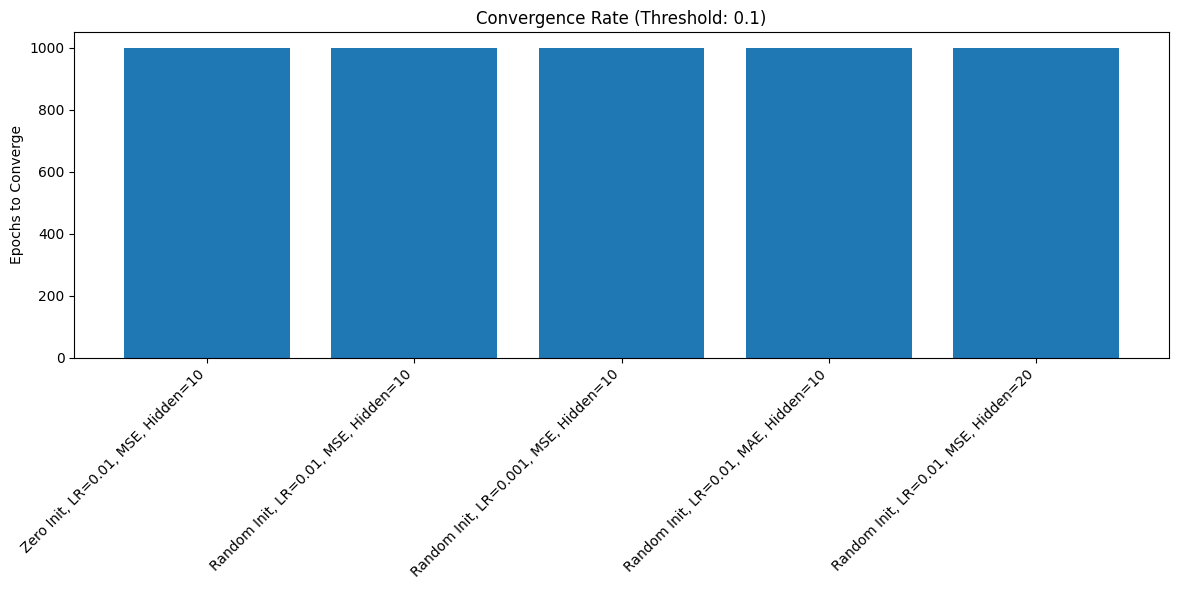

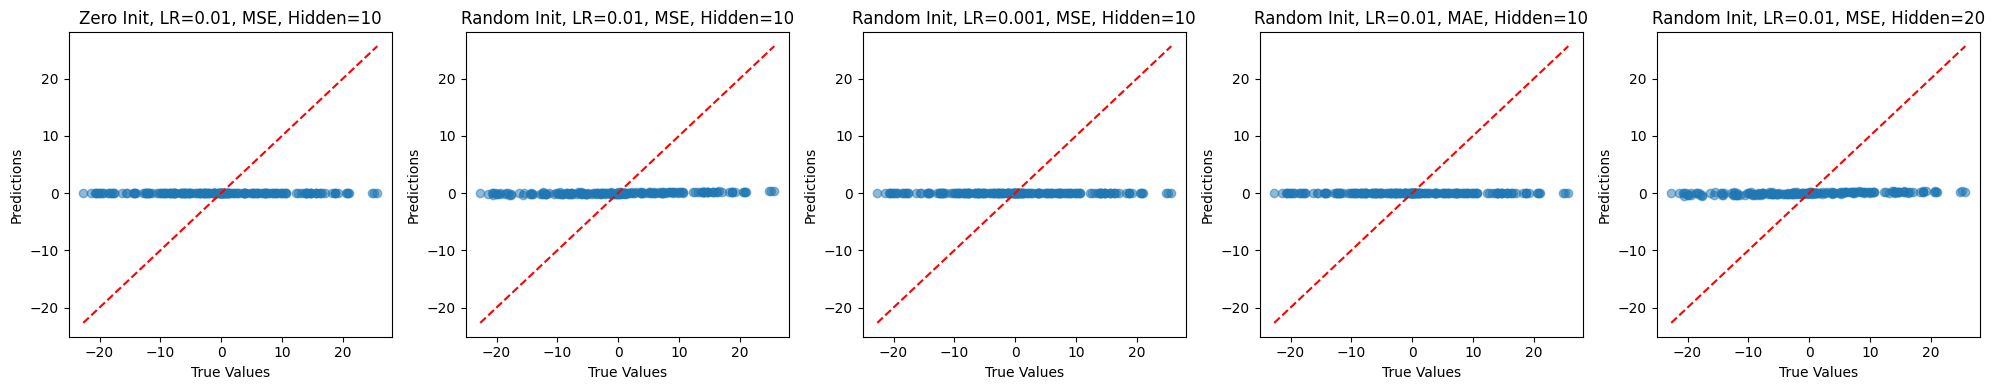

In [183]:
# Plot convergence rates
plt.figure(figsize=(12, 6))
threshold = 0.1
convergence_epochs = [
    (
        np.argmax(np.array(losses) < threshold)
        if np.any(np.array(losses) < threshold)
        else len(losses)
    )
    for losses in all_test_losses
]
plt.bar(range(len(experiments)), convergence_epochs)
plt.xticks(
    range(len(experiments)),
    [exp["name"] for exp in experiments],
    rotation=45,
    ha="right",
)
plt.ylabel("Epochs to Converge")
plt.title(f"Convergence Rate (Threshold: {threshold})")
plt.tight_layout()
plt.show()

# Plot fitting curves
plt.figure(figsize=(20, 4))
for i, (exp, model) in enumerate(zip(experiments, models)):
    plt.subplot(1, 5, i + 1)
    y_pred = model.forward(StandardScaler().fit_transform(X_test))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.title(exp["name"])
plt.tight_layout()
plt.show()

## Summary

#### **Experiment 1: Zero Initialization, LR=0.01, MSE, Hidden=10**

- **Observation**: Both train and test losses decrease steadily over epochs.
- **Train Loss**: Starts at `0.999912` and decreases to `0.887899`.
- **Test Loss**: Starts at `0.993797` and decreases to `0.874021`.
- **Conclusion**: The model is learning effectively, and the losses are improving over time. However, the initial weights being zero may slow down convergence compared to random initialization.

---

#### **Experiment 2: Random Initialization, LR=0.01, MSE, Hidden=10**

- **Observation**: Both train and test losses remain constant throughout all epochs.
- **Train Loss**: Stuck at `1.000000`.
- **Test Loss**: Stuck at `0.993972`.
- **Conclusion**: The model is not learning at all. This could indicate an issue with the implementation or that the learning rate is not suitable for this initialization.

---

#### **Experiment 3: Random Initialization, LR=0.001, MSE, Hidden=10**

- **Observation**: Both train and test losses remain constant throughout all epochs.
- **Train Loss**: Stuck at `1.000000`.
- **Test Loss**: Stuck at `0.993972`.
- **Conclusion**: The learning rate is too small for the model to make meaningful updates to the weights, resulting in no improvement in loss.

---

#### **Experiment 4: Random Initialization, LR=0.01, MAE, Hidden=10**

- **Observation**: The train and test losses improve slightly in the first few epochs but plateau quickly.
- **Train Loss**: Starts at `0.809840` and ends at `0.809369`.
- **Test Loss**: Starts at `0.792940` and ends at `0.794815`.
- **Conclusion**: The model shows minimal improvement with MAE as the loss function. This could be because MAE gradients are smaller and less sensitive to small changes compared to MSE, leading to slower convergence.

---

#### **Experiment 5: Random Initialization, LR=0.01, MSE, Hidden=20**

- **Observation**: Both train and test losses remain constant throughout all epochs.
- **Train Loss**: Stuck at `1.000000`.
- **Test Loss**: Stuck at `0.993972`.
- **Conclusion**: Despite increasing the number of hidden nodes to 20, the model does not learn anything. This suggests a fundamental issue with the training process (e.g., poor initialization or learning rate).

---
